In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances


In [7]:
# !wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

In [3]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.shape

(4803, 20)

In [4]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df.iloc[0,:]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [6]:
df.iloc[0,:]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [7]:
# Converting genres and keywords to a string, Example:
gen = json.loads(df.iloc[0,:]['genres'])
key = json.loads(df.iloc[0,:]['keywords'])
print(gen)
print("\n",key)

s = ""
for i in gen:
    s+=i['name']+" "
for i in key:
    s+=i['name']+" "

s=s.strip()
print("\n",s)

#remove duplicates
s1 = []
for i in s.split():
    if i not in s1:
        s1.append(i)

s1 = " ".join(s1)
print("\n",s1)
    

[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]

 [{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'space war'}, {'id': 3388, 'name': 'space colony'}, {'id': 3679, 'name': 'society'}, {'id': 3801, 'name': 'space travel'}, {'id': 9685, 'name': 'futuristic'}, {'id': 9840, 'name': 'romance'}, {'id': 9882, 'name': 'space'}, {'id': 9951, 'name': 'alien'}, {'id': 10148, 'name': 'tribe'}, {'id': 10158, 'name': 'alien planet'}, {'id': 10987, 'name': 'cgi'}, {'id': 11399, 'name': 'marine'}, {'id': 13065, 'name': 'soldier'}, {'id': 14643, 'name': 'battle'}, {'id': 14720, 'name': 'love affair'}, {'id': 165431, 'name': 'anti war'}, {'id': 193554, 'name': 'power relations'}, {'id': 206690, 'name': 'mind and soul'}, {'id': 209714, 'name': '3d'}]

 Action Adventure Fantasy Science Fiction culture clash future space war space colony society space travel futuristic romance 

In [8]:
# Add this string column
def genre_keyword_string(row):
    gen = json.loads(row['genres'])
    key = json.loads(row['keywords'])
    
    s = ""
    for i in gen:
        s+=i['name']+" "
    for i in key:
        s+=i['name']+" "
    s=s.strip()
    
    s1 = []
    for i in s.split():
        if i not in s1:
            s1.append(i)
    s1 = " ".join(s1)
    return s1
    
df['string'] = df.apply(genre_keyword_string,axis=1)
data = df[['string','original_title']]
data.columns=['X','y']
data.head()
        
    
    
    
    

,X,y
0,Action Adventure Fantasy Science Fiction cultu...,Avatar
1,Adventure Fantasy Action ocean drug abuse exot...,Pirates of the Caribbean: At World's End
2,Action Adventure Crime spy based on novel secr...,Spectre
3,Action Crime Drama Thriller dc comics crime fi...,The Dark Knight Rises
4,Action Adventure Science Fiction based on nove...,John Carter


In [9]:
tfidf = TfidfVectorizer(max_features=2000) # max 2000 distinct tokens (it takes the 2000 most occurring tokens)
X = tfidf.fit_transform(data['X'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 54770 stored elements in Compressed Sparse Row format>

In [10]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
# map movie to index
movie_index = pd.Series(data.index,index=data['y'])
movie_index.head()

y
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [12]:
ind = movie_index['The Dark Knight Rises']
query = X[ind].toarray()

print(ind)
print(query)

3
[[0. 0. 0. ... 0. 0. 0.]]


In [13]:
scores = cosine_similarity(query,X)
scores = scores.flatten()
scores

array([0.00647216, 0.04624012, 0.07699455, ..., 0.00996494, 0.        ,
       0.        ])

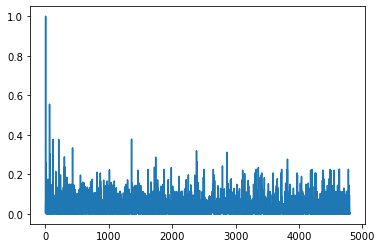

In [14]:
plt.plot(scores);

In [15]:
similarity_rank = (-scores).argsort() # sort index of scores from min to max (hence negative of score)
similarity_rank

array([   3,   65, 1359, ..., 2249, 3997, 4802])

[1.         0.55498307 0.3781129  ... 0.         0.         0.        ]


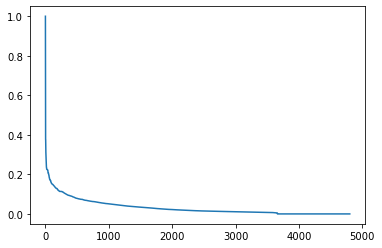

In [16]:
print(scores[similarity_rank])

plt.plot(scores[similarity_rank])

In [17]:
# get top 5 matches - "Dark Knight Rises"

recommended_idx = similarity_rank[1:6] # index 0 being "Dark Knight Rises" itself so filter for next 5 movies
recommended_idx


array([  65, 1359,  119,  210,  428])

In [18]:
df['title'].iloc[recommended_idx]

65      The Dark Knight
1359             Batman
119       Batman Begins
210      Batman & Robin
428      Batman Returns
Name: title, dtype: object

In [19]:
# Final recommendation function
def recommended_top_10(df,MOVIE):
    
    # create string column
    def genre_keyword_string(row):
        gen = json.loads(row['genres'])
        key = json.loads(row['keywords'])

        s = ""
        for i in gen:
            s+=i['name']+" "
        for i in key:
            s+=i['name']+" "
        s=s.strip()

        s1 = []
        for i in s.split():
            if i not in s1:
                s1.append(i)
        s1 = " ".join(s1)
        return s1
    
    df['string'] = df.apply(genre_keyword_string,axis=1)
    data = df[['string','title']]
    data.columns=['X','y']
    
    # vectorize string column
    tfidf = TfidfVectorizer(max_features=3000) # max 2000 distinct tokens (it takes the 2000 most occurring tokens)
    X = tfidf.fit_transform(data['X'])
    
    # map movie to index
    movies_index = pd.Series(data.index,index=data['y'])
    
    # get index and count vector of the movie
    ind = movies_index[MOVIE]
    query = X[ind].toarray()
    
    
    # get scores of all movies wrt to selected movie
    scores = cosine_similarity(query,X)
    scores = scores.flatten()
    
    # get top 10 similar movies based on score index
    similarity_rank = (-scores).argsort()
    recommended_idx = similarity_rank[1:11]
    
    
    return df['title'].iloc[recommended_idx]
    
    


    

In [20]:
recommended_top_10(df,"X-Men: The Last Stand")

203                            X2
511                         X-Men
46     X-Men: Days of Future Past
232                 The Wolverine
64              X-Men: Apocalypse
101            X-Men: First Class
122      X-Men Origins: Wolverine
182                       Ant-Man
79                     Iron Man 2
26     Captain America: Civil War
Name: title, dtype: object

In [21]:
recommended_top_10(df,"The Dark Knight")

3                    The Dark Knight Rises
119                          Batman Begins
1359                                Batman
428                         Batman Returns
210                         Batman & Robin
9       Batman v Superman: Dawn of Justice
299                         Batman Forever
813                               Superman
10                        Superman Returns
1296                          Superman III
Name: title, dtype: object

In [22]:
recommended_top_10(df,"Star Trek Into Darkness")

228                            Oblivion
581             Star Trek: Insurrection
56                     Star Trek Beyond
36      Transformers: Age of Extinction
3208    Star Wars: Clone Wars: Volume 1
1319                            Riddick
87                         Tomorrowland
158                           Star Trek
61                    Jupiter Ascending
2934                 Invaders from Mars
Name: title, dtype: object

In [23]:
recommended_top_10(df,"Oblivion")

47                 Star Trek Into Darkness
1319                               Riddick
193                            After Earth
4012    Escape from the Planet of the Apes
581                Star Trek: Insurrection
2047             Megiddo: The Omega Code 2
36         Transformers: Age of Extinction
539                             Titan A.E.
2934                    Invaders from Mars
51                             Pacific Rim
Name: title, dtype: object

In [24]:
recommended_top_10(df,"Zodiac")

993                             Jade
3772                     You Kill Me
1767                    Suspect Zero
2280                     Sea of Love
3834                          Frenzy
1651                       In Dreams
4477    All the Boys Love Mandy Lane
2452           House of Sand and Fog
4209                The Conversation
1599              The Age of Adaline
Name: title, dtype: object